# '02_regression.ipynb'

In [15]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [10]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

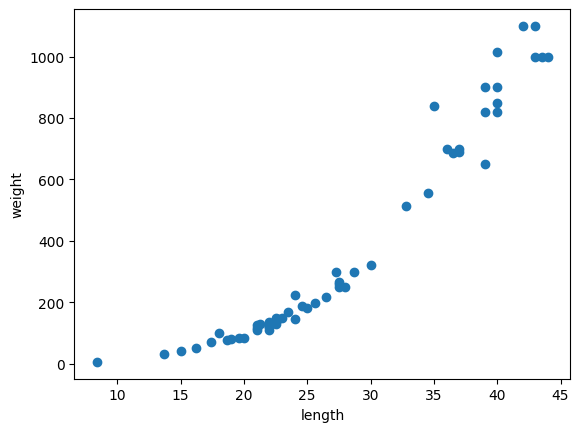

In [16]:
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# ???

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length,perch_weight,random_state=42)

# Vector -> Matrix

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
knr.score(X_test,y_test)

# 결정계수 R스퀘어를 사용하는 방법 

0.992809406101064

In [21]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(X_test)
# 예측 무게, 실제 무게 

mean_absolute_error(test_prediction,y_test)


19.157142857142862

In [ ]:
knr.score(X_train, y_train)



- 과대 적합(학습)(Overfitting)
    - 훈련 세트 점수 >> 테스트 세트 점수

- 과소 적합(학습)(Underfitting)
    -  훈련 세트 점수 << 테스트 세트 점수 or 그냥 점수가 낮음




In [ ]:
# 과소 적합

knr.n_neighbors = 3 

print(knr.score(X_train, y_train) - knr.score(X_test,y_test) * 100 )

knr.n_neighbors = 3 

print(knr.score(X_train, y_train) - knr.score(X_test,y_test) * 100)


-96.4841096448242
-96.4841096448242


[1033.33333333]


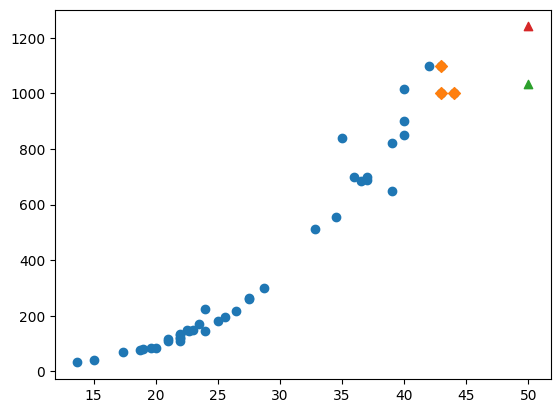

In [ ]:
print(knr.predict([[100]]))
distances, indexes = knr.kneighbors([[100]])


plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.scatter(50, 1241, marker='^')
plt.show()

# 나 강사님하고 그래프가 좀 다른듯 ???

# KNN은 범위 안에 있는 것 밖에 예측을 못 한다.


# 선형 회귀(Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
# 기울기, 절편

print(lr.coef_,lr.intercept_)


# 테스트 점수

print(lr.score(X_test,y_test))

# 길이 50의 무게 예측
lr.predict([[50]])





[39.01714496] -709.0186449535474
0.824750312331356


array([1241.83860323])

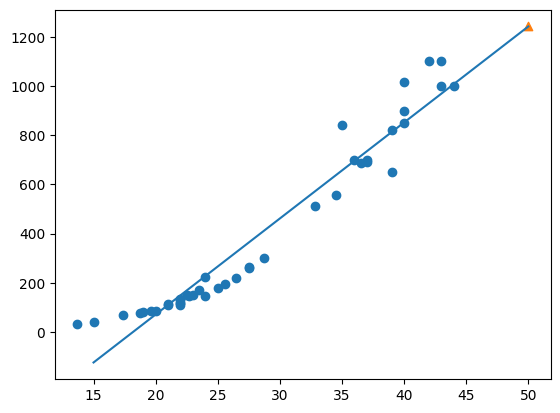

In [32]:
plt.scatter(X_train,y_train)
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.show()

# 다항 회귀 

In [ ]:
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))

In [42]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.coef_, lr.intercept_)

# ???
print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

lr.predict([[50**2, 50]])


# 실제로는 곡선이 아니라 직선을 꺾은 계단 모양

[  1.01433211 -21.55792498] 116.05021078278338
0.9706807451768623
0.9775935108325122


array([1573.98423528])

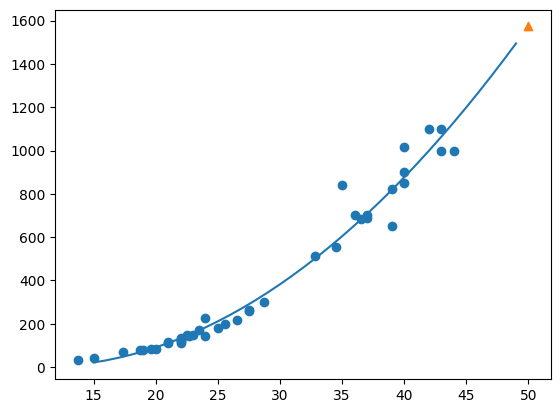

In [38]:
point = np.arange(15,50)
plt.scatter(X_train, y_train)
plt.plot(point, 1.014*point ** 2 - 21.55 * point + 116.05)
plt.scatter(50,1573, marker = '^')
plt.show()

# 특성 공학 (Feature Engineering)

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('./perch.csv')

perch_data = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])



In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_data, perch_weight, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))


0.9559326821885706
0.8796419177546367


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3,5]]) # 사이킷런에서는 fit이 의무라서 그런거지 크게 의미는 없다.
poly.transform([[2,3,5]])


# 계수(절편?)
## array([[1., 2., 3., 4., 6., 9.]])

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.]])

In [ ]:
poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test) # ???



# X_train_poly.shape
# 데이터 갯수 42, 컬럼 9개
## (42, 9)


array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [55]:
lr_p = LinearRegression()
lr.fit(X_train_poly, y_train)
lr.coef_, lr.intercept_

print(lr.coef_,lr.intercept_)

[  34.80604039  -88.68430232 -184.11606694   -2.2696004     8.74890226
    9.41670602   27.76120631 -119.89306061   93.68198334] 124.065217722336


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_p5 = poly.fit_transform(X_train)
X_test_p5 = poly.fit_transform(X_test)
X_train_p5.shape

# 초 과대 적합(Overfitting) -> 훈련셋에는 완벽한데, 테스트는 망한
lr.fit(X_train_p5, y_train)
lr.score(X_train_p5, y_train)
lr.score(X_test_p5, y_test)

-144.4049046409093